# LearnX sales forecasting

## 1. Load Data

In [315]:
pwd

'C:\\Users\\sai.ongole\\Downloads\\Day 5 Hackathon'

In [316]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test_TyVG1cP.csv")

In [317]:
df_train.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [318]:
df_test.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,Development,Course,1,0,1,0.007
1,884,884,1,Development,Course,1,0,1,0.007
2,885,885,1,Development,Course,1,0,1,0.007
3,886,886,1,Development,Course,1,0,1,0.007
4,887,887,1,Development,Course,0,0,1,0.007


In [319]:
df_train.describe()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,510323.000000,512087.000000
mean,274007.300650,434.917869,300.388344,0.380244,0.031639,0.488968,15375.101198,0.073345,120.826924
std,158228.834029,256.044161,173.365787,0.485447,0.175038,0.499879,7727.231205,0.100115,54.355258
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000
25%,136962.500000,214.000000,150.000000,0.000000,0.000000,0.000000,10584.000000,0.010000,84.000000
50%,273984.000000,427.000000,300.000000,0.000000,0.000000,0.000000,13776.000000,0.035000,111.000000
75%,411065.500000,658.000000,451.000000,1.000000,0.000000,1.000000,18123.000000,0.094000,146.000000
max,548027.000000,882.000000,600.000000,1.000000,1.000000,1.000000,100002.000000,0.768000,682.000000


In [320]:
df_train.describe(include='object')

,Course_Domain,Course_Type
count,512087,512087
unique,4,3
top,Development,Course
freq,264295,262747


In [321]:
df_test.describe()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
count,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,35880.000000
mean,274566.035000,912.500000,300.500000,0.400000,0.010972,0.501667,0.072938
std,158083.869473,17.318343,173.207246,0.489905,0.104174,0.500004,0.099412
min,883.000000,883.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,137730.250000,897.750000,150.750000,0.000000,0.000000,0.000000,0.010000
50%,274761.500000,912.500000,300.500000,0.000000,0.000000,1.000000,0.034500
75%,410872.750000,927.250000,450.250000,1.000000,0.000000,1.000000,0.094000
max,548087.000000,942.000000,600.000000,1.000000,1.000000,1.000000,0.768000


In [322]:
df_test.describe(include = 'object')

,Course_Domain,Course_Type
count,36000,36000
unique,4,3
top,Development,Course
freq,18480,18600


## 2. Exploratory Data Analysis


**Imputing Missing Values**

In [323]:
df_train.isnull().sum()

ID                       0
Day_No                   0
Course_ID                0
Course_Domain            0
Course_Type              0
Short_Promotion          0
Public_Holiday           0
Long_Promotion           0
User_Traffic             0
Competition_Metric    1764
Sales                    0
dtype: int64

In [324]:
df_train.fillna(data_train['Competition_Metric'].median(),inplace=True)

In [325]:
df_test.isnull().sum()

ID                      0
Day_No                  0
Course_ID               0
Course_Domain           0
Course_Type             0
Short_Promotion         0
Public_Holiday          0
Long_Promotion          0
Competition_Metric    120
dtype: int64

In [326]:
df_test.fillna(data_test['Competition_Metric'].median(),inplace=True)

In [327]:
df_train.isnull().sum()

ID                    0
Day_No                0
Course_ID             0
Course_Domain         0
Course_Type           0
Short_Promotion       0
Public_Holiday        0
Long_Promotion        0
User_Traffic          0
Competition_Metric    0
Sales                 0
dtype: int64

In [328]:
df_test.isnull().sum()

ID                    0
Day_No                0
Course_ID             0
Course_Domain         0
Course_Type           0
Short_Promotion       0
Public_Holiday        0
Long_Promotion        0
Competition_Metric    0
dtype: int64

**Univariate analysis: Categorical data**

In [329]:
df_train['Day_No'].value_counts().head()

256    600
150    600
401    600
146    600
402    600
Name: Day_No, dtype: int64

In [330]:
df_test['Day_No'].value_counts().head()

896    600
928    600
913    600
914    600
883    600
Name: Day_No, dtype: int64

In [331]:
df_train['Course_ID'].value_counts()

256    882
152    882
148    882
149    882
405    882
      ... 
432    698
435    698
436    698
181    698
511    698
Name: Course_ID, Length: 600, dtype: int64

In [332]:
df_test['Course_ID'].value_counts()

32     60
500    60
564    60
596    60
21     60
       ..
362    60
394    60
426    60
458    60
575    60
Name: Course_ID, Length: 600, dtype: int64

<AxesSubplot:xlabel='Course_Domain', ylabel='count'>

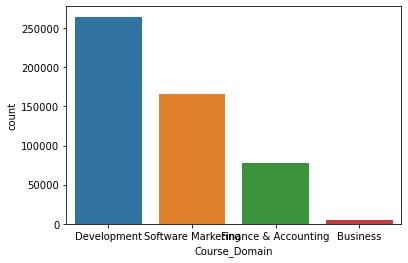

In [333]:
sns.countplot(data=df_train,x='Course_Domain')

<AxesSubplot:xlabel='Course_Type', ylabel='count'>

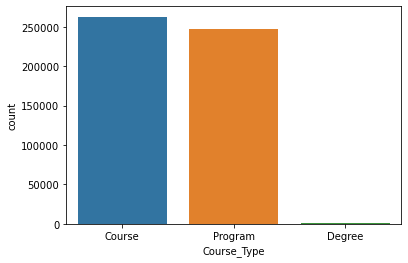

In [334]:
sns.countplot(data=df_train,x='Course_Type')

<AxesSubplot:xlabel='Course_Domain', ylabel='count'>

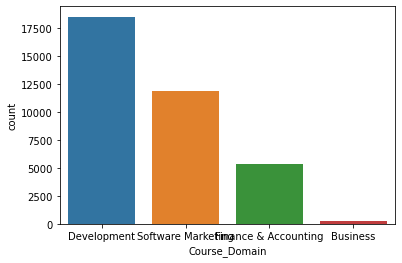

In [335]:
sns.countplot(data=df_test,x='Course_Domain')

<AxesSubplot:xlabel='Course_Type', ylabel='count'>

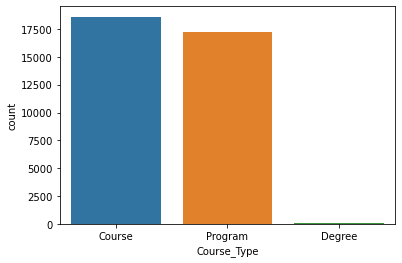

In [336]:
sns.countplot(data=df_test,x='Course_Type')

<AxesSubplot:xlabel='Short_Promotion', ylabel='count'>

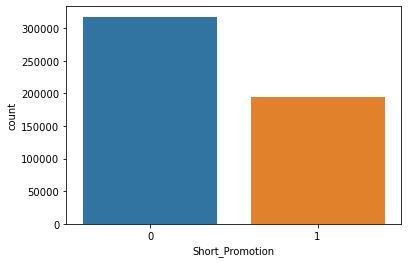

In [337]:
sns.countplot(data=df_train,x='Short_Promotion') 

<AxesSubplot:xlabel='Short_Promotion', ylabel='count'>

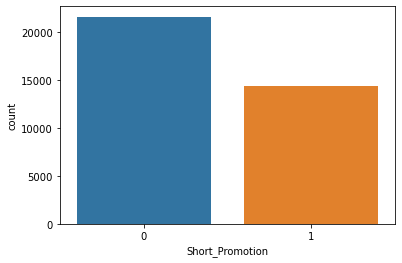

In [338]:
sns.countplot(data=df_test,x='Short_Promotion') 

<AxesSubplot:xlabel='Public_Holiday', ylabel='count'>

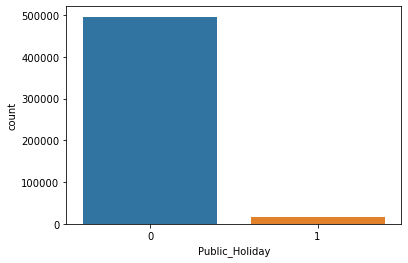

In [339]:
sns.countplot(data=df_train,x='Public_Holiday')

<AxesSubplot:xlabel='Public_Holiday', ylabel='count'>

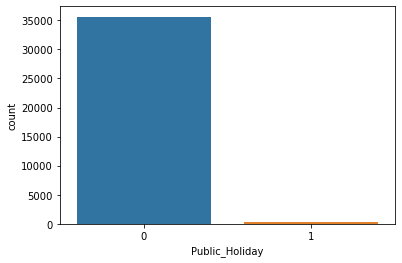

In [340]:
sns.countplot(data=df_test,x='Public_Holiday')

<AxesSubplot:xlabel='Long_Promotion', ylabel='count'>

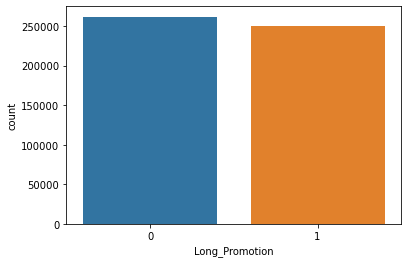

In [341]:
sns.countplot(data=df_train,x='Long_Promotion')

<AxesSubplot:xlabel='Long_Promotion', ylabel='count'>

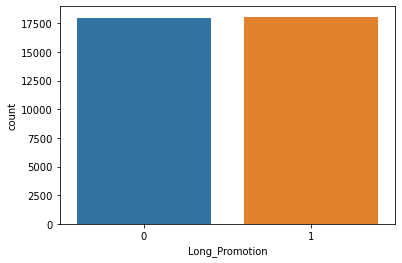

In [342]:
sns.countplot(data=df_test,x='Long_Promotion')

**Univariate analysis: Continuous data**

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

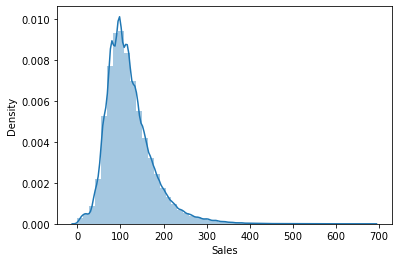

In [343]:
# Target Variable

sns.distplot(df_train['Sales'])

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='User_Traffic', ylabel='Density'>

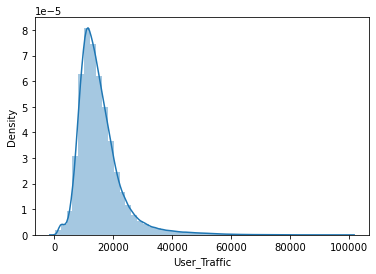

In [344]:
sns.distplot(df_train['User_Traffic'])

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Competition_Metric', ylabel='Density'>

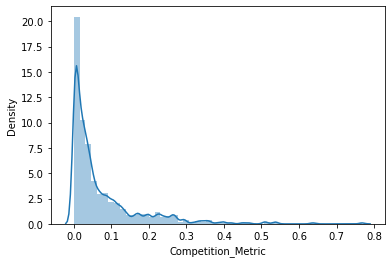

In [345]:
sns.distplot(df_train['Competition_Metric'])

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Competition_Metric', ylabel='Density'>

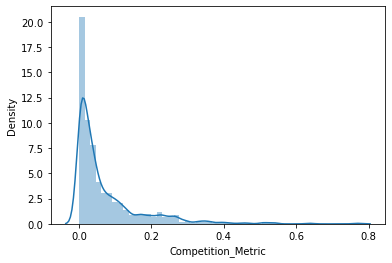

In [346]:
sns.distplot(df_test['Competition_Metric'])

<AxesSubplot:title={'center':'Course_ID 1'}, xlabel='Day_No'>

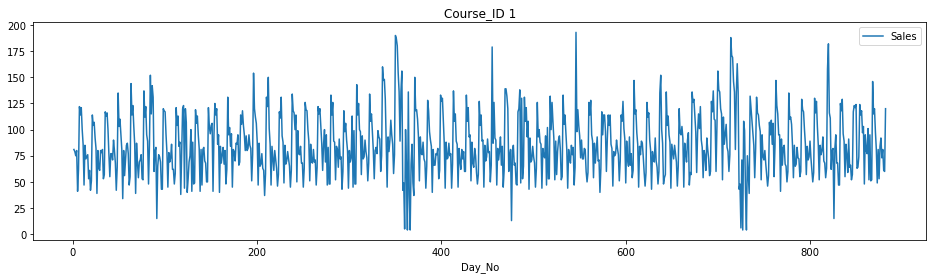

In [347]:
# sales of course_ID 1 full timne

strain = df_train[data_train.Sales>0]
strain.loc[strain['Course_ID']==1 ,['Day_No','Sales']].plot(x='Day_No',y='Sales',title='Course_ID 1',figsize=(16,4))

<AxesSubplot:title={'center':'Course_ID 2'}, xlabel='Day_No'>

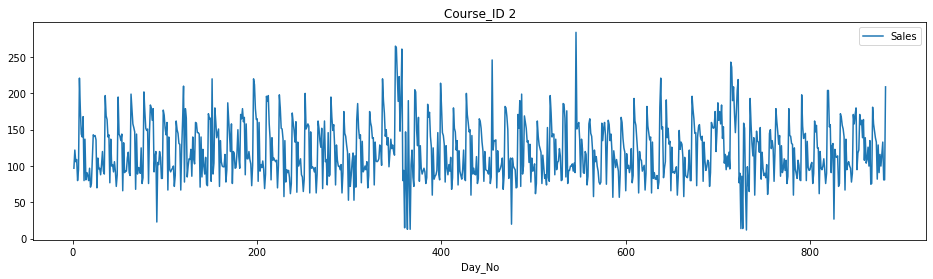

In [348]:
# sales of course_ID 2  full timne
strain = df_train[data_train.Sales>0]
strain.loc[strain['Course_ID']==2 ,['Day_No','Sales']].plot(x='Day_No',y='Sales',title='Course_ID 2',figsize=(16,4))

<AxesSubplot:title={'center':'Course_ID 1'}, xlabel='Day_No'>

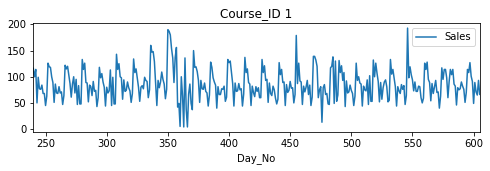

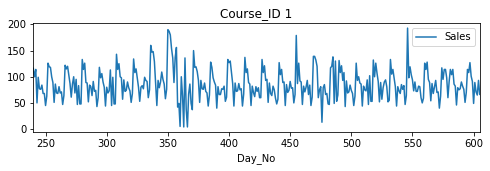

In [349]:
#sales of course_id 1 ,day no 240 vs 605
strain = df_train[data_train.Sales>0]
strain.loc[strain['Course_ID']==1 ,['Day_No','Sales']]     .plot(x='Day_No',y='Sales',title='Course_ID 1',figsize=(8,2),xlim=[240,605])
strain.loc[strain['Course_ID']==1 ,['Day_No','Sales']]     .plot(x='Day_No',y='Sales',title='Course_ID 1',figsize=(8,2),xlim=[240,605])

# 3.Feature Engineering


In [350]:
df_train1= df_train.copy()

In [351]:
df_train1.drop('User_Traffic',axis=1,inplace=True)

**Creating new feature Day_of_week in train and test data**

In [352]:
df_train1['Day_of_week']=df_train1['Day_No'].apply(lambda x:x%7)

In [353]:
df_test1 = df_test.copy()

In [354]:
df_test1['Day_of_week'] = df_test1['Day_No'].apply(lambda x:x%7)

**one hot encoding for categorical columns**

In [355]:
df_train1.dtypes

ID                      int64
Day_No                  int64
Course_ID               int64
Course_Domain          object
Course_Type            object
Short_Promotion         int64
Public_Holiday          int64
Long_Promotion          int64
Competition_Metric    float64
Sales                   int64
Day_of_week             int64
dtype: object

In [356]:
df_train1=pd.get_dummies(df_train1,columns=['Course_Domain','Course_Type'],drop_first=True)

In [357]:
df_test1=pd.get_dummies(df_test1,columns=['Course_Domain','Course_Type'],drop_first=True)

In [358]:
df_train1.dtypes

ID                                      int64
Day_No                                  int64
Course_ID                               int64
Short_Promotion                         int64
Public_Holiday                          int64
Long_Promotion                          int64
Competition_Metric                    float64
Sales                                   int64
Day_of_week                             int64
Course_Domain_Development               uint8
Course_Domain_Finance & Accounting      uint8
Course_Domain_Software Marketing        uint8
Course_Type_Degree                      uint8
Course_Type_Program                     uint8
dtype: object

**splitting train data into train and test(for validation)**

In [359]:
test_val = df_train1[:6*7*600]

train_val = df_train1[6*7*600:]

**Bivariate analysis using correlation and heatmaps**

<AxesSubplot:>

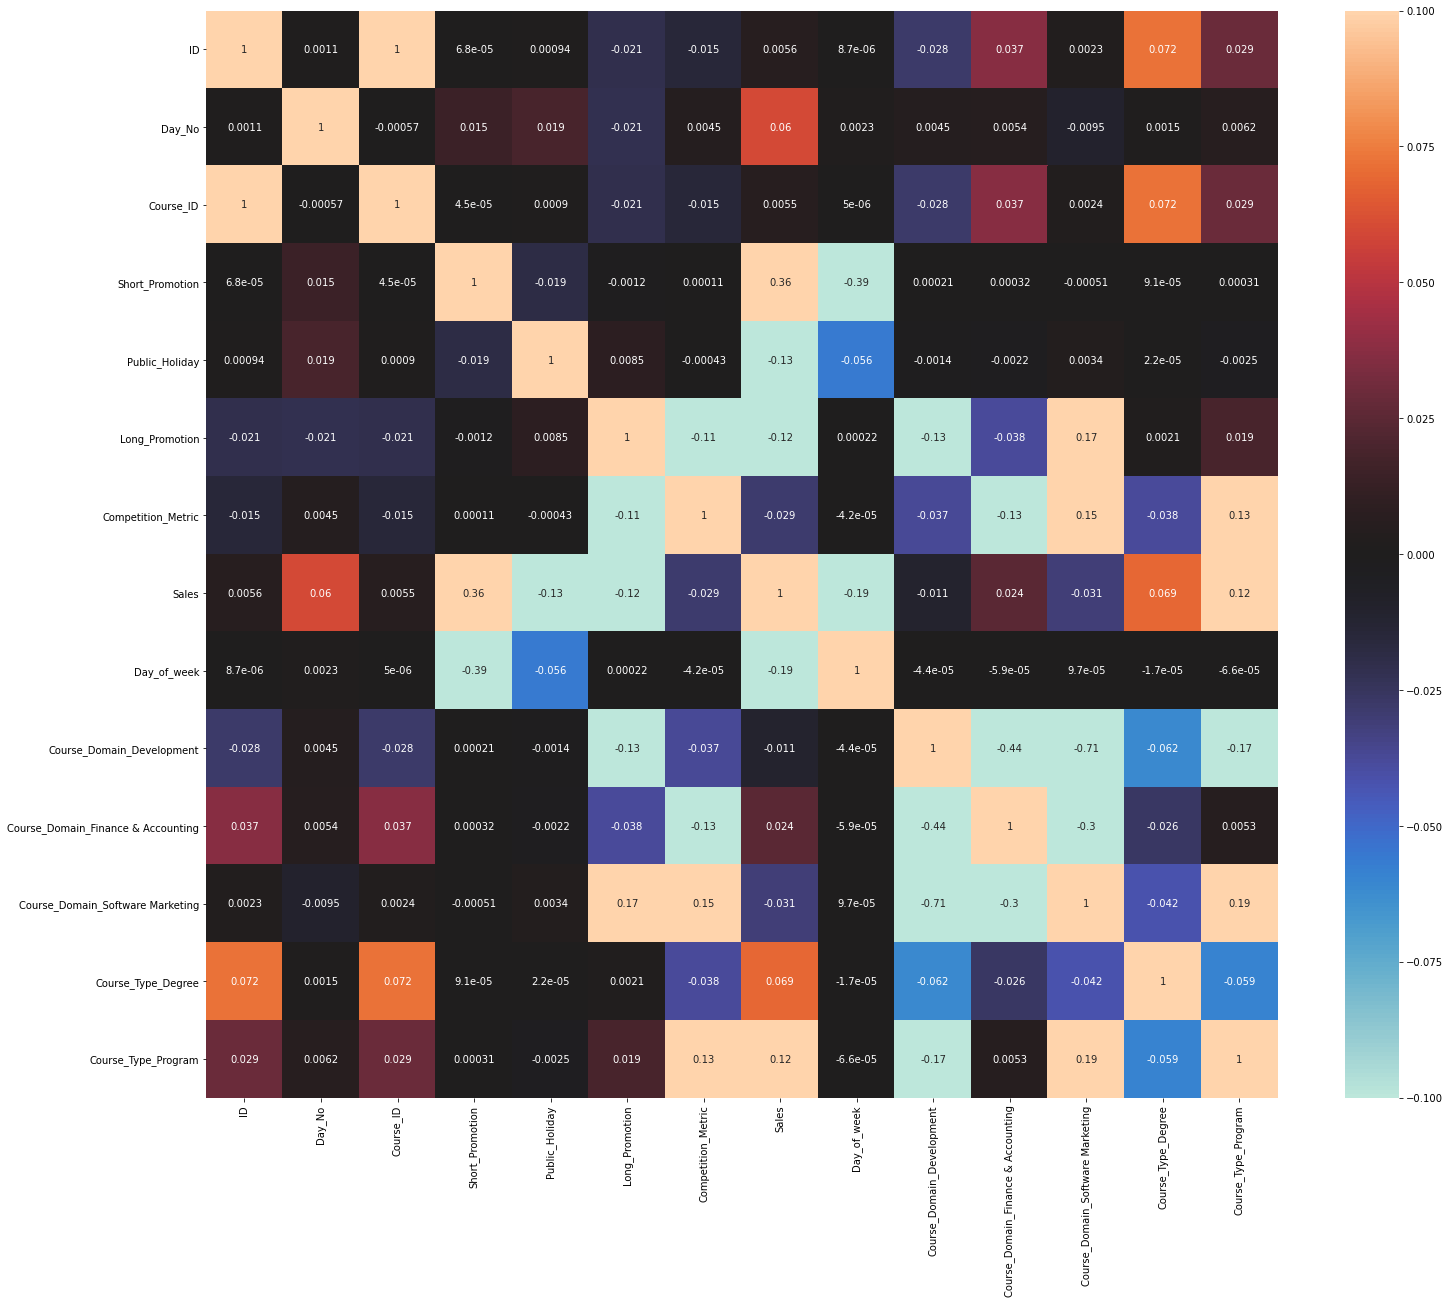

In [360]:
plt.subplots(figsize=(24,20))
sns.heatmap(train_x.corr(),annot=True, vmin=-0.1, vmax=0.1,center=0)

**defining RMSLE metric (Root mean squared log error)**

In [361]:
from sklearn.metrics import mean_squared_log_error
def rmsle(y, yhat):
    return (np.sqrt(mean_squared_log_error(y, yhat)))*1000

def rmsle_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmsle", rmsle(y,yhat)

**As the target variable is skewed applying log1p transformation**

In [362]:
xtrain_val = train_val.drop(['Sales','ID'],axis=1 )
ytrain_val = np.log1p(train_val.Sales)
xtest_val = test_val.drop(['Sales','ID'],axis=1 )
ytest_val = np.log1p(test_val.Sales)

# 4.Model Building

In [363]:
#!pip install xgboost

**XGBoost model**

In [364]:
import xgboost as xgb

In [365]:
#Tuned parameter set1
'''
params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.03,
          "max_depth": 14,
          "subsample": 0.9,
          "colsample_bytree": 0.8,
          "silent": 1,
          "seed": 10
          }
num_boost_round = 6000


dtrain = xgb.DMatrix(xtrain_val, ytrain_val)
dvalid = xgb.DMatrix(xtest_val, ytest_val)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
'''

'\nparams = {"objective": "reg:linear",\n          "booster" : "gbtree",\n          "eta": 0.03,\n          "max_depth": 14,\n          "subsample": 0.9,\n          "colsample_bytree": 0.8,\n          "silent": 1,\n          "seed": 10\n          }\nnum_boost_round = 6000\n\n\ndtrain = xgb.DMatrix(xtrain_val, ytrain_val)\ndvalid = xgb.DMatrix(xtest_val, ytest_val)\nwatchlist = [(dtrain, \'train\'), (dvalid, \'eval\')]\n'

In [366]:
params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.03,
          "max_depth": 16,
          "subsample": 0.9,
          "colsample_bytree": 0.7,
          "silent": 1,
          "seed": 15
          }
num_boost_round = 6500


dtrain = xgb.DMatrix(xtrain_val, ytrain_val)
dvalid = xgb.DMatrix(xtest_val, ytest_val)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]


In [367]:
from time import time

In [368]:
print("Train a XGBoost model")
start = time()
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, 
  early_stopping_rounds=100, feval=rmsle_xg, verbose_eval=True)
end = time()
print('Training time is {:2f} s.'.format(end-start))

Train a XGBoost model
[23:32:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[23:32:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:4.10663	train-rmsle:4106.63176	eval-rmse:4.05911	eval-rmsle:4059.11303
[1]	train-rmse:3.98429	train-rmsle:3984.28488	eval-rmse:3.93994	eval-rmsle:3939.93688
[2]	train-rmse:3.86567	train-rmsle:3865.67354	eval-rmse:3.82226	eval-rmsle:3822.26109
[3]	train-rmse:3.75069	train-rmsle:3750.69857	eval-rmse:3.70721	eval-rmsle:3707.21149
[4]	train-rmse:3.63918	train-rmsle:3639.18829	eval-rmse:3.59567	eval-rm

[89]	train-rmse:0.32727	train-rmsle:327.27096	eval-rmse:0.44586	eval-rmsle:445.85860
[90]	train-rmse:0.31964	train-rmsle:319.64201	eval-rmse:0.43961	eval-rmsle:439.60631
[91]	train-rmse:0.31248	train-rmsle:312.48322	eval-rmse:0.43320	eval-rmsle:433.20197
[92]	train-rmse:0.30562	train-rmsle:305.61867	eval-rmse:0.42712	eval-rmsle:427.11681
[93]	train-rmse:0.29877	train-rmsle:298.77007	eval-rmse:0.42163	eval-rmsle:421.63244
[94]	train-rmse:0.29236	train-rmsle:292.35947	eval-rmse:0.41707	eval-rmsle:417.07206
[95]	train-rmse:0.28602	train-rmsle:286.02114	eval-rmse:0.41196	eval-rmsle:411.95527
[96]	train-rmse:0.27972	train-rmsle:279.71804	eval-rmse:0.40707	eval-rmsle:407.06542
[97]	train-rmse:0.27401	train-rmsle:274.01263	eval-rmse:0.40198	eval-rmsle:401.98118
[98]	train-rmse:0.26835	train-rmsle:268.35147	eval-rmse:0.39725	eval-rmsle:397.24806
[99]	train-rmse:0.26285	train-rmsle:262.84954	eval-rmse:0.39297	eval-rmsle:392.96666
[100]	train-rmse:0.25732	train-rmsle:257.31939	eval-rmse:0.38946	

[185]	train-rmse:0.11292	train-rmsle:112.92104	eval-rmse:0.28554	eval-rmsle:285.54493
[186]	train-rmse:0.11241	train-rmsle:112.41145	eval-rmse:0.28533	eval-rmsle:285.32928
[187]	train-rmse:0.11219	train-rmsle:112.19294	eval-rmse:0.28507	eval-rmsle:285.06738
[188]	train-rmse:0.11181	train-rmsle:111.80679	eval-rmse:0.28487	eval-rmsle:284.87286
[189]	train-rmse:0.11144	train-rmsle:111.44406	eval-rmse:0.28474	eval-rmsle:284.74319
[190]	train-rmse:0.11115	train-rmsle:111.15178	eval-rmse:0.28457	eval-rmsle:284.56551
[191]	train-rmse:0.11091	train-rmsle:110.90941	eval-rmse:0.28436	eval-rmsle:284.36533
[192]	train-rmse:0.11063	train-rmsle:110.62725	eval-rmse:0.28416	eval-rmsle:284.15695
[193]	train-rmse:0.11028	train-rmsle:110.28351	eval-rmse:0.28407	eval-rmsle:284.06995
[194]	train-rmse:0.10992	train-rmsle:109.92497	eval-rmse:0.28390	eval-rmsle:283.90402
[195]	train-rmse:0.10960	train-rmsle:109.60361	eval-rmse:0.28375	eval-rmsle:283.74487
[196]	train-rmse:0.10924	train-rmsle:109.23804	eval-rm

[281]	train-rmse:0.09303	train-rmsle:93.03040	eval-rmse:0.28023	eval-rmsle:280.23300
[282]	train-rmse:0.09289	train-rmsle:92.88628	eval-rmse:0.28019	eval-rmsle:280.19097
[283]	train-rmse:0.09272	train-rmsle:92.71608	eval-rmse:0.28035	eval-rmsle:280.34633
[284]	train-rmse:0.09266	train-rmsle:92.65694	eval-rmse:0.28036	eval-rmsle:280.36010
[285]	train-rmse:0.09249	train-rmsle:92.49569	eval-rmse:0.28039	eval-rmsle:280.38630
[286]	train-rmse:0.09231	train-rmsle:92.30735	eval-rmse:0.28041	eval-rmsle:280.40686
[287]	train-rmse:0.09222	train-rmsle:92.21859	eval-rmse:0.28041	eval-rmsle:280.41315
[288]	train-rmse:0.09210	train-rmsle:92.09857	eval-rmse:0.28036	eval-rmsle:280.36153
[289]	train-rmse:0.09201	train-rmsle:92.00773	eval-rmse:0.28035	eval-rmsle:280.35012
[290]	train-rmse:0.09161	train-rmsle:91.61407	eval-rmse:0.28034	eval-rmsle:280.34428
[291]	train-rmse:0.09148	train-rmsle:91.48263	eval-rmse:0.28030	eval-rmsle:280.30419
[292]	train-rmse:0.09139	train-rmsle:91.38637	eval-rmse:0.28028	e

[378]	train-rmse:0.08156	train-rmsle:81.55552	eval-rmse:0.28071	eval-rmsle:280.70772
[379]	train-rmse:0.08145	train-rmsle:81.44598	eval-rmse:0.28072	eval-rmsle:280.71651
[380]	train-rmse:0.08138	train-rmsle:81.37588	eval-rmse:0.28071	eval-rmsle:280.71088
[381]	train-rmse:0.08135	train-rmsle:81.34886	eval-rmse:0.28077	eval-rmsle:280.77191
[382]	train-rmse:0.08133	train-rmsle:81.33119	eval-rmse:0.28076	eval-rmsle:280.76139
[383]	train-rmse:0.08122	train-rmsle:81.21628	eval-rmse:0.28082	eval-rmsle:280.81906
[384]	train-rmse:0.08113	train-rmsle:81.12889	eval-rmse:0.28082	eval-rmsle:280.81569
[385]	train-rmse:0.08101	train-rmsle:81.00614	eval-rmse:0.28082	eval-rmsle:280.81638
[386]	train-rmse:0.08095	train-rmsle:80.95387	eval-rmse:0.28080	eval-rmsle:280.79566
[387]	train-rmse:0.08094	train-rmsle:80.93829	eval-rmse:0.28079	eval-rmsle:280.78935
[388]	train-rmse:0.08090	train-rmsle:80.90221	eval-rmse:0.28079	eval-rmsle:280.78884
[389]	train-rmse:0.08078	train-rmsle:80.77727	eval-rmse:0.28089	e

In [369]:
print("validating")
xtest_val.sort_index(inplace=True) 
ytest_val.sort_index(inplace=True) 
yhat = gbm.predict(xgb.DMatrix(xtest_val))
error = rmsle(np.expm1(ytest_val), np.expm1(yhat))

print('RMSPE: {:.6f}'.format(error))

validating
RMSPE: 280.907187


In [370]:
res = pd.DataFrame(data = ytest_val)
res['Prediction']=yhat
res = pd.merge(V_xtest,res, left_index= True, right_index=True)
res['Ratio'] = res.Prediction/res.Sales
res['Error'] =abs(res.Ratio-1)
res['Weight'] = res.Sales/res.Prediction
res.head()

,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Day_of_week,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Degree,Course_Type_Program,Sales,Prediction,Ratio,Error,Weight
0,1,1,0,1,1,0.007,1,1,0,0,0,0,4.406719,4.832336,1.096584,0.096584,0.911923
1,2,1,0,0,1,0.007,2,1,0,0,0,0,4.382027,4.163716,0.950181,0.049819,1.052432
2,3,1,0,0,1,0.007,3,1,0,0,0,0,4.330733,4.107239,0.948393,0.051607,1.054415
3,4,1,0,0,1,0.007,4,1,0,0,0,0,4.394449,4.187871,0.952991,0.047009,1.049328
4,5,1,0,0,1,0.007,5,1,0,0,0,0,3.737670,3.957972,1.058941,0.058941,0.944340


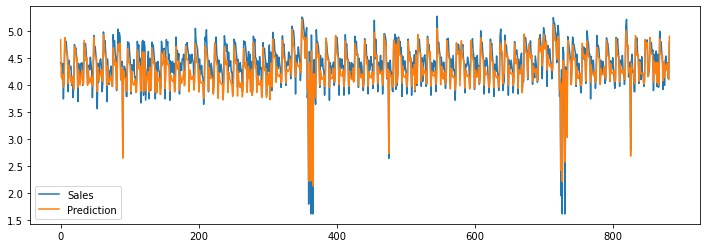

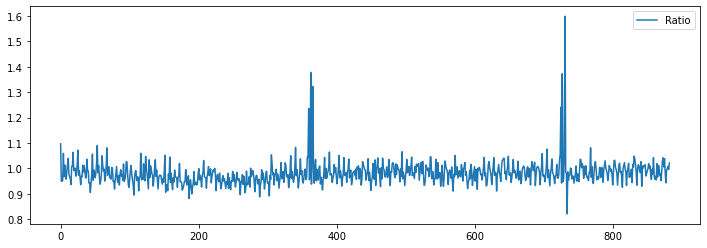

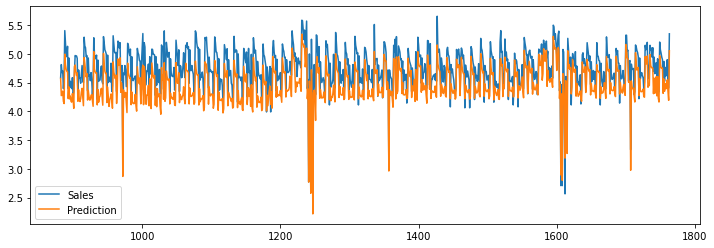

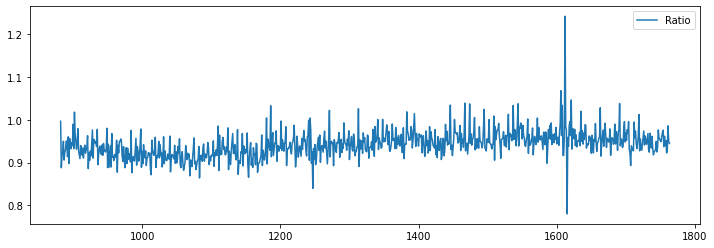

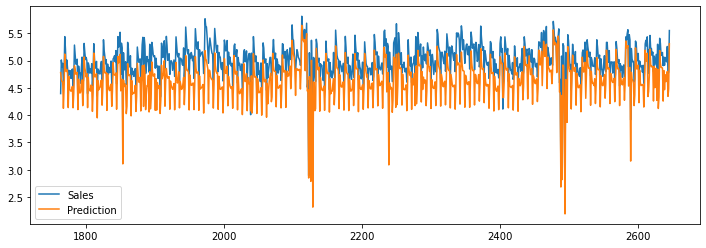

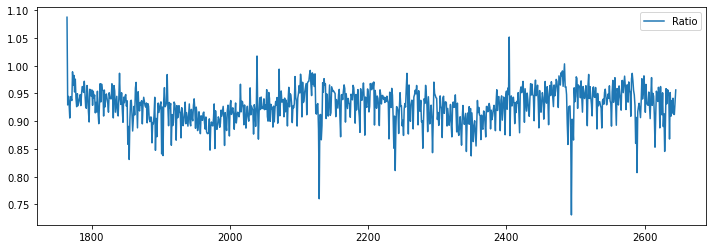

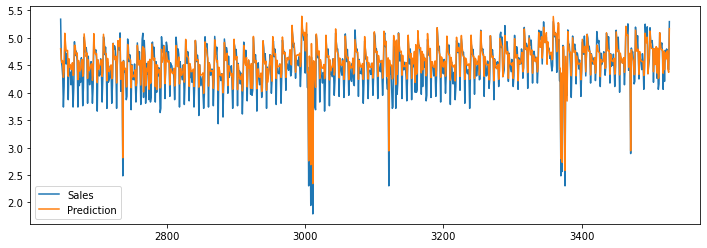

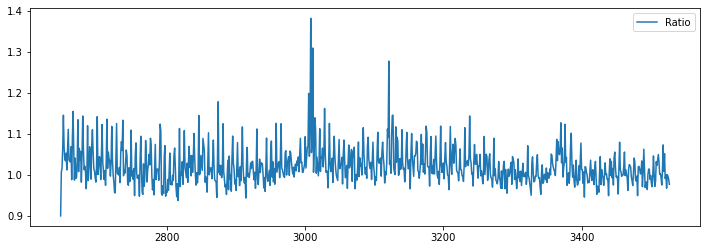

In [371]:
for i in range(1,5):
    s1 = pd.DataFrame(res[res['Course_ID']==i],columns = ['Sales','Prediction'])
    s2 = pd.DataFrame(res[res['Course_ID']==i],columns = ['Ratio'])
    s1.plot(figsize=(12,4))
    s2.plot(figsize=(12,4))
    plt.show()

In [372]:
df_test2=df_test1.drop(['ID'],axis=1)

In [373]:
print("Make predictions on the test set")

dtest = xgb.DMatrix(df_test2)
test_probs = gbm.predict(dtest)

# model1  kaggle private score 0.12647
result = pd.DataFrame({"ID": df_test1['ID'], 'Sales': np.expm1(test_probs)})

Make predictions on the test set


In [374]:
result

,ID,Sales
0,883,105.561943
1,884,96.747673
2,885,95.961327
3,886,95.806702
4,887,54.172344
...,...,...
35995,548083,161.101166
35996,548084,132.680923
35997,548085,129.514313
35998,548086,129.629745


weight correction
RMSPE for 0.995:289.761009
RMSPE for 0.996:287.866814
RMSPE for 0.997:286.033178
RMSPE for 0.998:284.261169
RMSPE for 0.999:282.552159
RMSPE for 1.000:280.907187
RMSPE for 1.001:279.327297
RMSPE for 1.002:277.813869
RMSPE for 1.003:276.367640
RMSPE for 1.004:274.990014
RMSPE for 1.005:273.681692
RMSPE for 1.006:272.443851
RMSPE for 1.007:271.277587
RMSPE for 1.008:270.183545
RMSPE for 1.009:269.162870
RMSPE for 1.010:268.216155
RMSPE for 1.011:267.344314
RMSPE for 1.012:266.548171
RMSPE for 1.013:265.828213
RMSPE for 1.014:265.185165
RMSPE for 1.015:264.619647
RMSPE for 1.016:264.132025
RMSPE for 1.017:263.722847
RMSPE for 1.018:263.392378
RMSPE for 1.019:263.140971
RMSPE for 1.020:262.968869
RMSPE for 1.021:262.876183
RMSPE for 1.022:262.863022
RMSPE for 1.023:262.929394
RMSPE for 1.024:263.075246
Best weight for Score:1.022    262.863022
dtype: float64


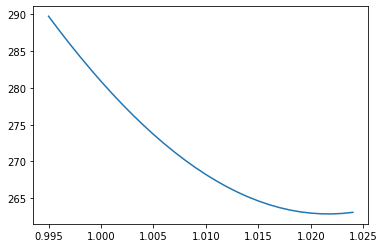

In [375]:
print("weight correction")
W=[(0.995+(i/1000)) for i in range(30)]
S =[]
for w in W:
    error = rmsle(np.expm1(V_ytest), np.expm1(yhat*w))
    print('RMSPE for {:.3f}:{:.6f}'.format(w,error))
    S.append(error)
Score = pd.Series(S,index=W)
Score.plot()
BS = Score[Score.values == Score.values.min()]
print ('Best weight for Score:{}'.format(BS))

In [376]:
Hackathon_submission = pd.DataFrame({"ID": df_test1['ID'], 'Sales': np.expm1(test_probs*1.001)})
Hackathon_submission

,ID,Sales
0,883,106.060616
1,884,97.196617
2,885,96.405876
3,886,96.250404
4,887,54.394066
...,...,...
35995,548083,161.928085
35996,548084,133.336990
35997,548085,130.151703
35998,548086,130.267822


In [377]:
Hackathon_submission.to_csv('Hackathon_submission.csv',index=False) 